# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [3]:
# Install required packages (if not available on server)
!pip install getdist
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

## <span style='color:deepskyblue'> 1. Hubble Parameter $H(z)$ </span>

The Hubble rate $H(z)$ in terms of redshift ($z$) is defined as:

$$
\boxed{
H(z) = H_0\sqrt{\Omega_\Lambda + \Omega_k (1+z)^{2} + \Omega_m (1+z)^{3} + \Omega_r (1+z)^{4}}
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k + \Omega_r = 1
$$

where $\Omega_r$ can be neglected as the current value is negligible compared to the values of $\Omega_\Lambda$, $\Omega_k$, and $\Omega_m$.

The present Hubble rate has been expressed in terms of $h\,\frac{100 \text{km}}{\text{s Mpc}}$ to assist with the Markov-Chain Monte-Carlo in later exercise.

Example parameters have been inputted through the function to check functionality using some accepted values of $H_0$, $\Omega_\Lambda$, $\Omega_m$ and a randomly selected redshift $z$.

In [7]:
# Hubble rate
# H_0 in km s^-1 Mpc^-1
def Hubble(z, Omega_Lambda, Omega_m, h): 
    Omega_k = 1 - Omega_Lambda - Omega_m
    return h * 100 * np.sqrt(Omega_Lambda + (Omega_k*(1. +z)**2) + (Omega_m*(1. +z)**3))

## Example parameters inputted to the Hubble parameter equation
h = 0.67 # km s^-1 Mpc^-1
Omega_Lambda = 0.73
Omega_m = 0.134 / (0.73**2) ## values from https://ned.ipac.caltech.edu/level5/March04/Lahav/Lahav1_4.html
z = 5
Hubble(z, Omega_Lambda, Omega_m, h)

500.0901507112805

##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

## <span style='color:deepskyblue'> 2. Luminosity Distance $d_L(z)$ </span>

A function `Dz(H_0, Omega_Lambda, Omega_m, z)` to calculate $D(z)$ was created, performing the integration using `quad` imported from `scipy.integrate`([scipy](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)). This performs general purpose integration of `lambda z: ` between 2 limits, including $\pm \infty$. In $D(z)$, `lambda z: ` could be defined as `1 / Hubble(z, Omega_Lambda, Omega_m, H_0)` to perform the integration between $0$ and $z$, and the result could be multiplied by $H_0$, expressed as $h\,\frac{100 \text{km}}{\text{s Mpc}}$ once more.

To create the luminosity distance function `dL(z, c, H_0, Omega_Lambda, Omega_m)`, `if` and `else` statements were used to define each domain of $d_L(z)$ ($\Omega_k > 0$, $\Omega_k = 0$, $\Omega_k < 0$). This works by defining $\Omega_k$ in terms of $\Omega_{Lambda}$ and $\Omega_m$ to provide a changeable value through different inputs of known values.

In [10]:
from scipy.integrate import quad
c = 2.998E5 ## speed of light in km s^-1

def Dz(h, Omega_Lambda, Omega_m, z):
    result, error = quad(lambda z: 1. / Hubble(z, Omega_Lambda, Omega_m, h), 0., z)
    return h * 100 * result, error

def dL(z, c, h, Omega_Lambda, Omega_m):
    def outside(z, c, h):
        ## c in km s^-1; H_0 in terms of h
        return (c / (h * 100)) * (1 + z) 

    Dz_result, _ = Dz(h, Omega_Lambda, Omega_m, z)
    Omega_k = 1 - Omega_Lambda - Omega_m
    
    if Omega_k > 0:
        return outside(z, c, h) * (1/(np.sqrt(Omega_k)) * np.sinh(np.sqrt(Omega_k) * Dz_result))
    if Omega_k == 0:
        return outside(z, c, h) * Dz_result
    else:
        return outside(z, c, h) * (1/(np.sqrt(-1*Omega_k)) * np.sinh(np.sqrt(-1*Omega_k) * Dz_result))

## Example test parameters
h = 0.67 # km s^-1 Mpc^-1
Omega_Lambda = 0.73
Omega_m = 0.134 / (0.73**2) ## values from https://ned.ipac.caltech.edu/level5/March04/Lahav/Lahav1_4.html
z = 0.7
d_L = dL(z, c, h, Omega_Lambda, Omega_m)
print (f"The Luminosity Distance at z = {z} is {d_L:.2e} Mpc taking the Cosmological Constant to be {Omega_Lambda} and the Matter Mass Density to be {Omega_m:.2}.")

The Luminosity Distance at z = 0.7 is 4.54e+03 Mpc taking the Cosmological Constant to be 0.73 and the Matter Mass Density to be 0.25.


## <span style='color:deepskyblue'> 2a. Distance Modulus $\mu(z)$ </span>

The theoretical distance modulus is calculated here based on the calculation of $d_L(z)$ as defined above. The conversion between $Mpc$ and $pc$ is taken into account and simplified outside of the log as a $+25$ factor.

In [12]:
## distance modulus function (converting the dL into pc)
def dist_mod(z, c, h, Omega_Lambda, Omega_m):
    return 5. * np.log10(dL(z, c, h, Omega_Lambda, Omega_m)) + 25

## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [14]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [15]:
# pull out the redshifts (zs), distance modulus (dist_mod_obs) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod_obs = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [16]:
print(dist_mod_obs[0])

35.3465833928


In [17]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod_obs / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod_obs + err_dist_mod)/5.-6.) - 10.**((dist_mod_obs - err_dist_mod)/5.-6.))

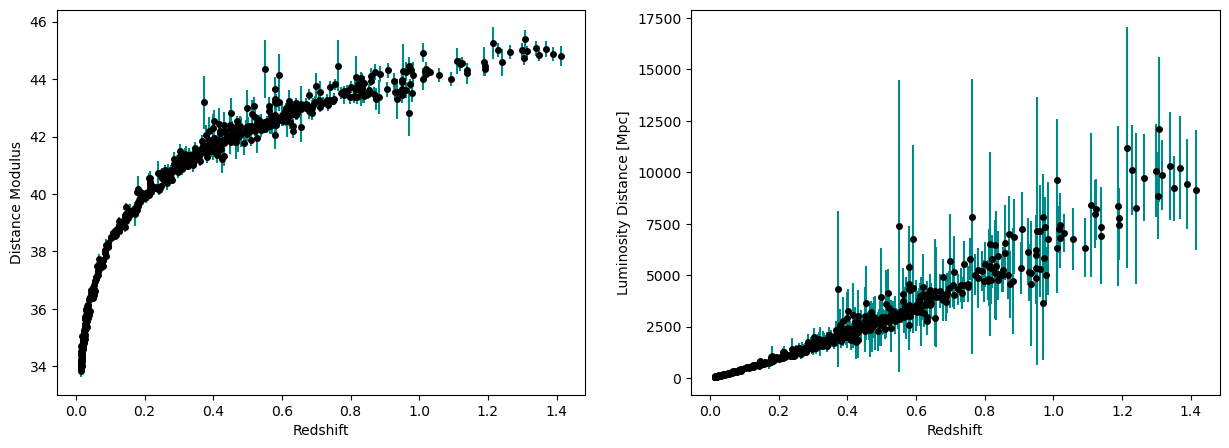

In [18]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod_obs, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

#### Chi-squared function

observed distance modulus mu(obs) as from the data set

theoretical distance modulus mu(theo) calculated from the previous defined function using the same zs as in the dataset
- looping from i=1 to i=580 done through np.sum and using zs

## <span style='color:deepskyblue'> 3. Markov-Chain Monte Carlo (MCMC) Algorithm </span>

Code for this section was created with the assist of ChatGPT for debugging and explanation. Further explanation was found using [prappleizer](https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial.html) to understand the basics of MCMC and [Koehrsen](https://medium.com/towards-data-science/markov-chain-monte-carlo-in-python-44f7e609be98) to see an example using real-life data.

#### <span style='color:deepskyblue'> 3a. Chi-squared: $\chi^2$ </span>

Initially, $\chi^2$ needed to be defined (`chi_2` in the code) by calculating the $\mu_i^{theo}$ (`dist_mod`) using the redshifts from the Union2.1 data, and using the $\chi^2$ equation as given previously to compare to the $\mu_i^{obs}$ (`dist_mod_obs`) given by `data.T[3]` as before. This gives the redshifts provided by the Union2.1 data both the theoretical value and observed value given for distance modulus, as needed for the Metropolis-Hastings algorithm to calculate the acceptance criteria.

#### <span style='color:deepskyblue'> 3b. Prior Probability: $P(\theta)_{old}$ </span>

Also needing to be defined was the probability, $P(\theta)_{old}$ and $P(\theta)_{prop}$. These are needed for the acceptance ratio, $r$, and were given by a uniform prior for $0.5<h<1.0$, $0.0<\Omega_m<1.0$ and $0.0<\Omega_{\Lambda}<1.0$. I proposed that the step should be given by a small Gaussian noise addition, and then I could define the Metropolis-Hastings algorithm.

#### <span style='color:deepskyblue'> 3c. Metropolis-Hastings Algorithm </span>

This algorithm (`met_hast`) contains a `for` loop to increase the proposed $\theta$ values by the Gaussian proposal step, and append each accepted step into a new array given by `accepted_values`. The arguments given for this algorithm are `theta_init`, `zs`, `dist_mod_obs`, `err_dist_mod`, `num_steps`, `proposal_step`, `chi_2`, `prob_old`, where everything except for `theta_init` and `num_steps` are given by previously defined functions. The only values required to start this algorithm are proposed values of $h$, $\Omega_m$, and $\Omega_{\Lambda}$, and the number of steps wanted for this algorithm to use, as shown by the example below.

In [23]:
## chi-squared function:
def chi_2(theta, zs, dist_mod_obs, err_dist_mod):
    h, Omega_Lambda, Omega_m = theta
    theo_dist_mod = np.array([dist_mod(z, c, h, Omega_Lambda, Omega_m) for z in zs])
    chi2 = np.sum(((theo_dist_mod - dist_mod_obs) / err_dist_mod) ** 2)
    return chi2

## P(theta)_old function:
def prob_old(theta):
    h, Omega_m, Omega_Lambda = theta
    
    if 0.5 <= h <= 1.0 and 0.0 <= Omega_m <= 1.0 and 0.0 <= Omega_Lambda <= 1.0:
        if np.abs(Omega_m + Omega_Lambda - 1.0) < 0.05:
            return 1
        else:
            return 0
    else:
        return 0 

## new proposed step (by Gaussian noise):
def proposal_step(theta_old, step_size=0.01):
    return theta_old + np.random.normal(0, step_size, size=len(theta_old))

## metropolis-hastings algorithm:
def met_hast(theta_init, zs, dist_mod_obs, err_dist_mod,
                        num_steps, proposal_step, chi_2, prob_old):
    theta_old = np.array(theta_init)
    chi_old = chi_2(theta_old, zs, dist_mod_obs, err_dist_mod)
    P_old = prob_old(theta_old)

    chain = [theta_old.copy()]
    
    for step in range(num_steps):
        theta_prop = proposal_step(theta_old)  
        chi_prop = chi_2(theta_prop, zs, dist_mod_obs, err_dist_mod)
        P_prop = prob_old(theta_prop)
        acceptance_ratio = np.exp((chi_old - chi_prop) / 2) * (P_prop / P_old)
        r = np.random.uniform(0, 1)
        
        if r < acceptance_ratio:
            theta_old = theta_prop
            chi_old = chi_prop
            P_old = P_prop
            chain.append(theta_old.copy())

    return np.array(chain)

In [24]:
## running the MCMC for an example starting values

# initial theta conditions (h, Omega_m, Omega_Lambda)
theta_init = [0.67, 0.134/(0.73**2), 0.73]
# number of steps for the MCMC to use
num_steps = 1000

# run MCMC and append values of r above acceptance ratio
accepted_samples = met_hast(theta_init, zs, dist_mod_obs, err_dist_mod, num_steps, proposal_step, chi_2, prob_old)
## first 5 rows of array of accepted samples
print(f"h, Omega_m, Omega_Lambda")
print(accepted_samples[0:5])

h, Omega_m, Omega_Lambda
[[0.67       0.25145431 0.73      ]
 [0.65845024 0.24370073 0.73567782]
 [0.64543416 0.24710992 0.73668004]
 [0.65365275 0.25455243 0.74373743]
 [0.65455575 0.26273782 0.74561472]]


After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

## <span style='color:deepskyblue'> 4. Plotting </span>

#### <span style='color:deepskyblue'> 4a. Triangle Plot </span>

All values from the `accepted_samples` array have been included in this plot (no burn in), to include all values used, not just the later section. The triangle plot was chosen to best visualise the relationship between each parameter and to compare how they relate to each other.

Removed no burn in


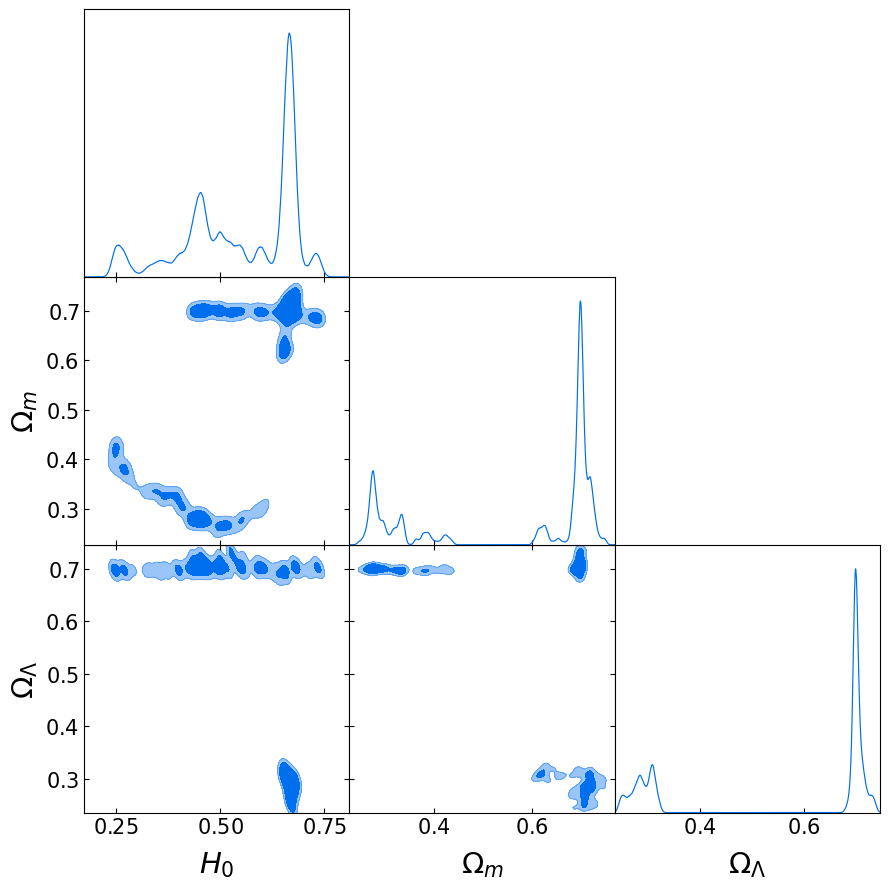

In [29]:
import getdist, IPython
from getdist import plots, MCSamples
import pylab
pylab.rc('text',usetex=False) 

# Labels and names for the parameters (replace with your parameters)
my_labels = ['H_0', '\\Omega_m', '\\Omega_\\Lambda']
my_names = ['H_0', '\\Omega_m', '\\Omega_\\Lambda']

my_dim = 3
accepted_samples = np.transpose(np.reshape(accepted_samples,(my_dim,int(accepted_samples.size/my_dim))))
samples1 = MCSamples(samples=accepted_samples, labels=my_labels, names=my_names)

#Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(samples1, filled = True)

#### <span style='color:deepskyblue'> 4b. Theoretical Curves </span>

The theoretical distance modulus was calculated from the redshifts in Union2.1 using the 'best' values of $h$, $\Omega_m$, and $\Omega_{\Lambda}$ given by the median values of the `accepted_samples` from the MCMC algorithm. The best fit line shows a good correlation between this theoretical curve of points, with few outliers off the line.

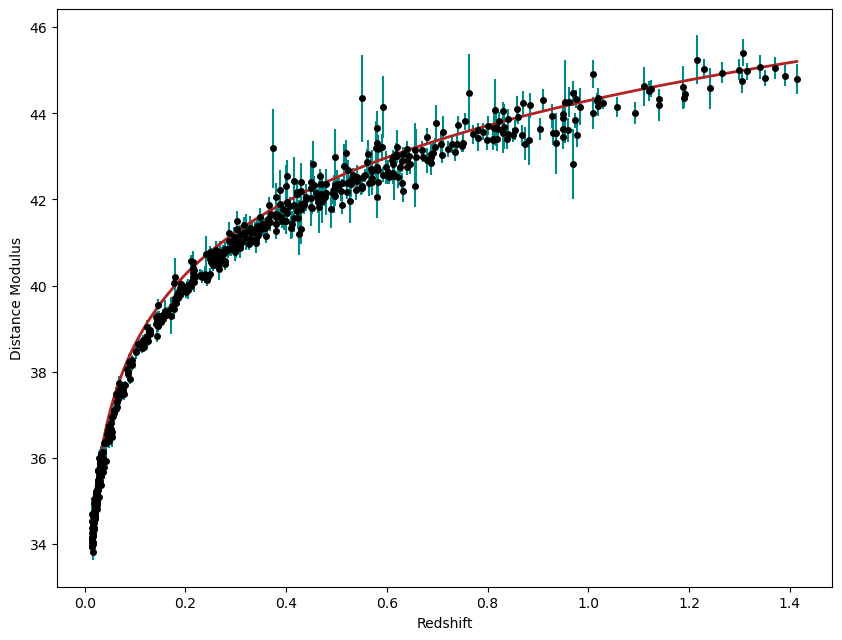

In [32]:
# example of theoretical curves
c = 2.998E5 ## speed of light in km s^-1
          
zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

h_best, Omega_m_best, Omega_Lambda_best = np.median(accepted_samples, axis=0)

for z in zsort:
    d_best_fit.append(dist_mod(z, c, h_best, Omega_m_best, Omega_Lambda_best))
    d_min.append(dist_mod(z, c, h_best, Omega_m_best, Omega_Lambda_best))
    d_max.append(dist_mod(z, c, h_best, Omega_m_best, Omega_Lambda_best))

plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

plt.errorbar(zs, dist_mod_obs, yerr=err_dist_mod,\
             fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2)
plt.show()